# Case 2

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()
import chardet

#### Descobrindo qual é o enconding do dataset 'data_comexstat.csv'

In [2]:
#descobrindo qual é o enconding do dataset data_comexstat.csv



with open('data_comexstat.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])
# pd.read_csv('data_comexstat.csv', encoding=result['encoding'])

ISO-8859-1


## Leitura da base e análise

In [3]:
comexstat = pd.read_csv('data_comexstat.csv', index_col=0, parse_dates=True, encoding="latin_1")

In [4]:
comexstat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117965 entries, 1997-01-01 to 2019-12-01
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   product  117965 non-null  object 
 1   state    117965 non-null  object 
 2   country  117965 non-null  object 
 3   type     117965 non-null  object 
 4   route    117965 non-null  object 
 5   tons     117965 non-null  float64
 6   usd      117965 non-null  float64
dtypes: float64(2), object(5)
memory usage: 7.2+ MB


In [5]:
comexstat['product'].unique()

array(['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'], dtype=object)

In [6]:
comexstat['type'].unique()

array(['Import', 'Export'], dtype=object)

## Criando novas bases

In [7]:
onlyexport = comexstat[comexstat['type'] == 'Export']

In [8]:
onlyexport['year'] = onlyexport.index.year

/Users/izaserpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
onlyexport

,product,state,country,type,route,tons,usd,year
date,,,,,,,,
1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997
1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997
1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997
1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997
1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997
...,...,...,...,...,...,...,...,...
2019-12-01,wheat,PR,United States,Export,Sea,0.400,400.0,2019
2019-12-01,wheat,RS,Vietnam,Export,Sea,36698.000,6963002.0,2019
2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0,2019


In [10]:
soybeans = onlyexport[onlyexport['product'] == 'soybeans']
soybean_oil = onlyexport[onlyexport['product'] == 'soybean_oil']
soybean_meal = onlyexport[onlyexport['product'] == 'soybean_meal']

In [11]:
soybeans_bymonth = soybeans.groupby('date')['tons'].agg(pd.Series.sum).to_frame()
soybean_oil_bymonth = soybean_oil.groupby('date')['tons'].agg(pd.Series.sum).to_frame()
soybean_meal_bymonth = soybean_meal.groupby('date')['tons'].agg(pd.Series.sum).to_frame()

# The evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’

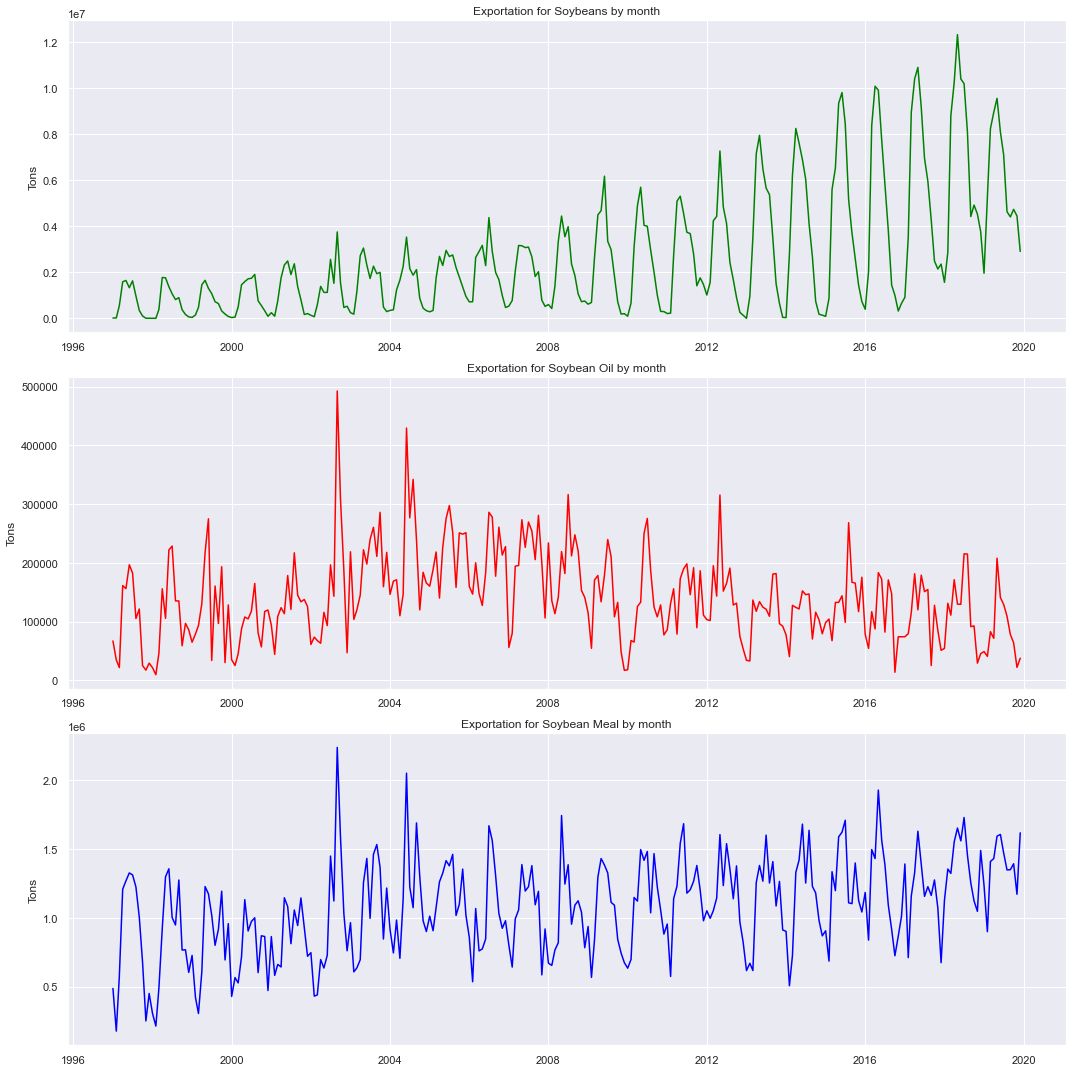

In [12]:
fig = plt.figure(figsize=(15.0, 15.0))

plt.subplot(3,1,1)
plt.title('Exportation for Soybeans by month')
plt.ylabel('Tons')
plt.plot(soybeans_bymonth, color='green')

plt.subplot(3,1,2)
plt.title('Exportation for Soybean Oil by month')
plt.ylabel('Tons')
plt.plot(soybean_oil_bymonth, color='red')

plt.subplot(3,1,3)
plt.title('Exportation for Soybean Meal by month')
plt.ylabel('Tons')
plt.plot(soybean_meal_bymonth, color='blue')

fig.tight_layout()
plt.show()

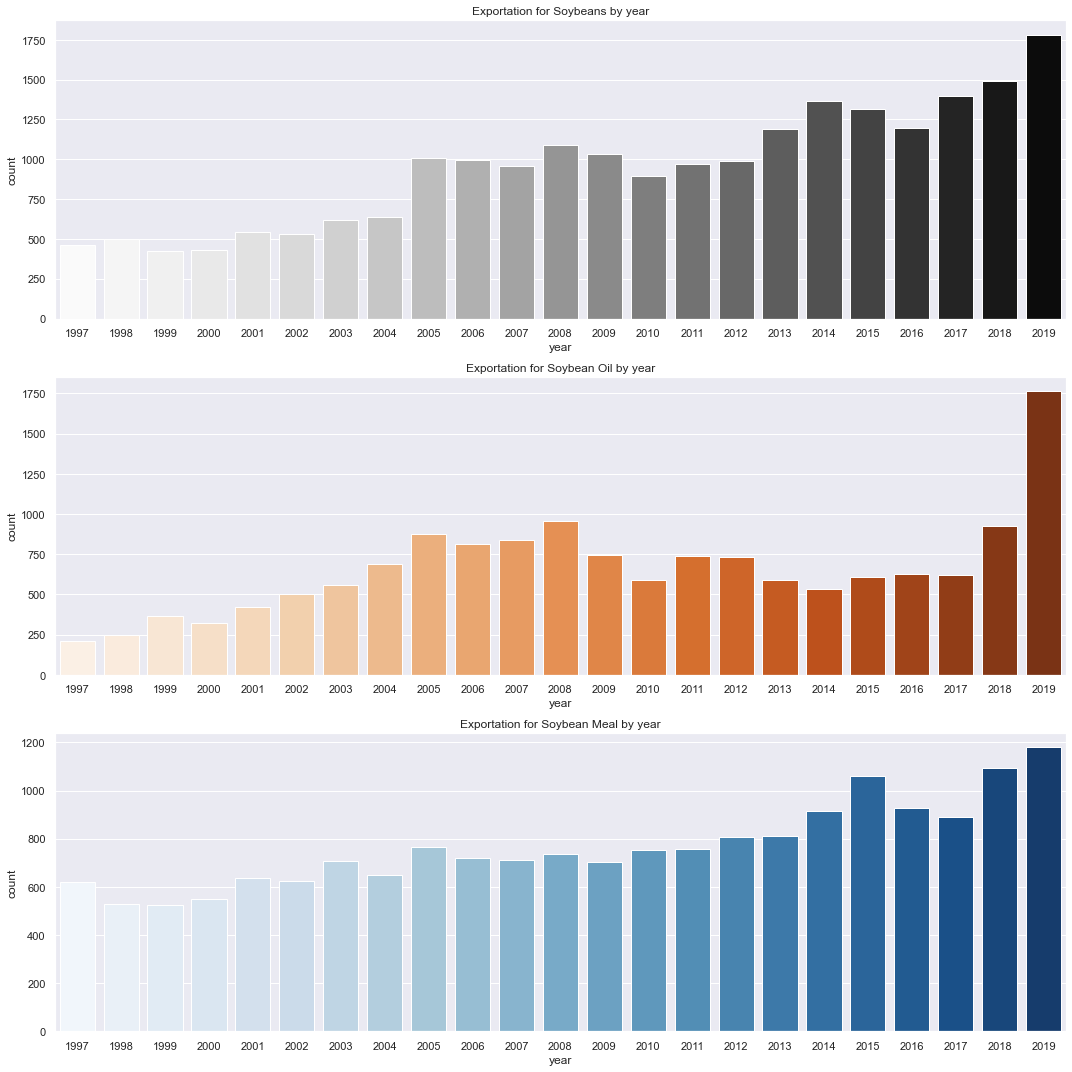

In [13]:
fig = plt.figure(figsize=(15.0, 15.0))
plt.ylim(0, 1800)

plt.subplot(3,1,1)
sns.countplot(x="year", data=soybeans[['tons','year']], palette="Greys")
plt.title('Exportation for Soybeans by year')

plt.subplot(3,1,2)
sns.countplot(x="year", data=soybean_oil[['tons','year']], palette="Oranges")
plt.title('Exportation for Soybean Oil by year')

plt.subplot(3,1,3)
sns.countplot(x="year", data=soybean_meal[['tons','year']], palette="Blues")
plt.title('Exportation for Soybean Meal by year')

fig.tight_layout()
plt.show()

# The 3 most important products exported by Brazil in the last 5 years

* Considerando o valor acumulado

In [14]:
lastfiveyears = onlyexport.copy()
lastfiveyears = lastfiveyears.loc[lastfiveyears['year'] >= 2015]
lastfiveyears.groupby('product')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:3]

,usd
product,
soybeans,1.233255e+11
sugar,4.093849e+10
soybean_meal,2.840772e+10


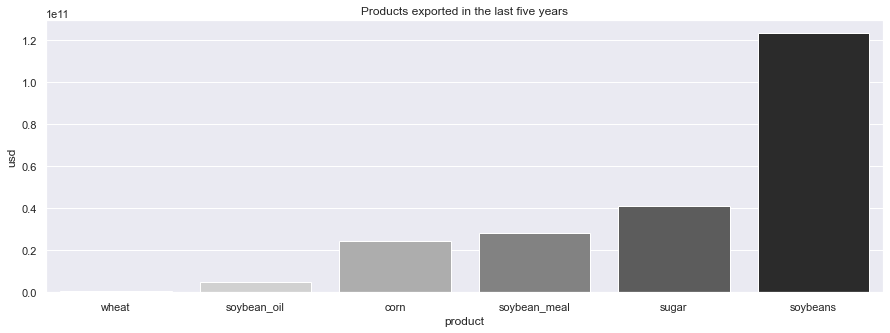

In [15]:
fig = plt.figure(figsize=(15.0, 5.0))

ordem2 = lastfiveyears.groupby('product')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = True).reset_index()
sns.barplot(x='product', y='usd', data=ordem2, ci = None, palette="Greys", order=ordem2['product'])
plt.title('Products exported in the last five years');


# The main routes through which Brazil have been exporting ‘corn’ in the last few years. 

* Considering the last 5 years.

In [16]:
lastfiveyears[lastfiveyears['product'] == 'corn'].groupby('route')['tons'].agg(pd.Series.sum).to_frame().sort_values('tons', ascending = False)

,tons
route,
Sea,1.383810e+08
River,5.869627e+06
Other,2.660552e+05
Ground,7.250953e+04
Air,1.015261e+04


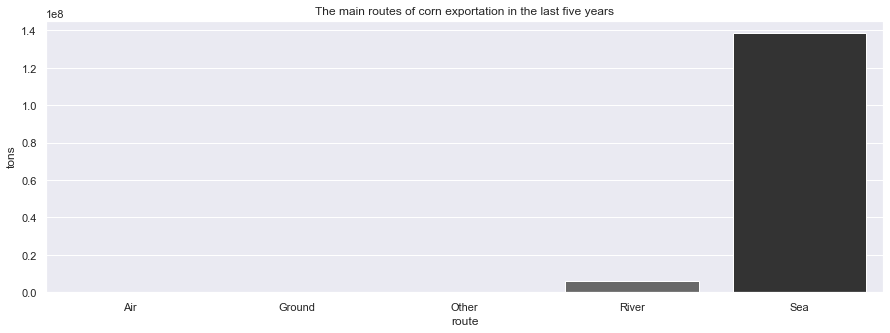

In [17]:
fig = plt.figure(figsize=(15.0, 5.0))

ordem3 = lastfiveyears[lastfiveyears['product'] == 'corn'].groupby('route')['tons'].agg(pd.Series.sum).to_frame().sort_values('tons', ascending = True).reset_index()
sns.barplot(x='route', y='tons', data=ordem3, ci = None, palette="Greys", order=ordem3['route'])
plt.title('The main routes of corn exportation in the last five years');

A rota mais importante é por via marítima.

# Are there differences in the relative importance of routes depending on the product?

* Considering the last 5 years.

In [18]:
print('Important routes for Soybean Meal')
lastfiveyears[lastfiveyears['product'] == 'soybean_meal'].groupby('route')['tons'].agg(pd.Series.sum).to_frame().sort_values('tons', ascending = False)

Important routes for Soybean Meal


,tons
route,
Sea,7.652543e+07
Other,9.149716e+04
Air,2.202439e+04
Ground,8.336698e+03
River,1.974000e+02


In [19]:
print('Important routes for Soybean Oil')
lastfiveyears[lastfiveyears['product'] == 'soybean_oil'].groupby('route')['tons'].agg(pd.Series.sum).to_frame().sort_values('tons', ascending = False)

Important routes for Soybean Oil


,tons
route,
Sea,6553971.761
Ground,129905.861
Other,24137.484
River,3409.907
Air,2.589


In [20]:
print('Important routes for Soybeans')
lastfiveyears[lastfiveyears['product'] == 'soybeans'].groupby('route')['tons'].agg(pd.Series.sum).to_frame().sort_values('tons', ascending = False)

Important routes for Soybeans


,tons
route,
Sea,3.161480e+08
River,8.566090e+06
Other,1.519021e+06
Ground,9.834406e+04
Air,5.389800e+01


In [21]:
print('Important routes for Sugar')
lastfiveyears[lastfiveyears['product'] == 'sugar'].groupby('route')['tons'].agg(pd.Series.sum).to_frame().sort_values('tons', ascending = False)

Important routes for Sugar


,tons
route,
Sea,1.193094e+08
Ground,6.296318e+05
Other,4.784887e+04
River,4.678631e+04
Air,3.017900e+01


In [22]:
print('Important routes for Wheat')
lastfiveyears[lastfiveyears['product'] == 'wheat'].groupby('route')['tons'].agg(pd.Series.sum).to_frame().sort_values('tons', ascending = False)

Important routes for Wheat


,tons
route,
Sea,3884332.581
Ground,1491.142
Other,11.482
Air,1.059


Não há diferença entre as rotas mais importantes para os produtos. Rota mais utilizada, considerando a quantidade em toneladas, é por por via marítima.

# Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?

In [23]:
lastthreeyears = onlyexport.copy()
lastthreeyears = lastthreeyears.loc[lastthreeyears['year'] >= 2017]

In [24]:
lastthreeyears.groupby('country')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:10]

,usd
country,
China,6.768644e+10
Iran,5.487578e+09
Netherlands,5.164750e+09
Spain,4.233952e+09
Thailand,3.877906e+09
South Korea,3.183690e+09
Bangladesh,3.098313e+09
Vietnam,2.898982e+09
India,2.875862e+09


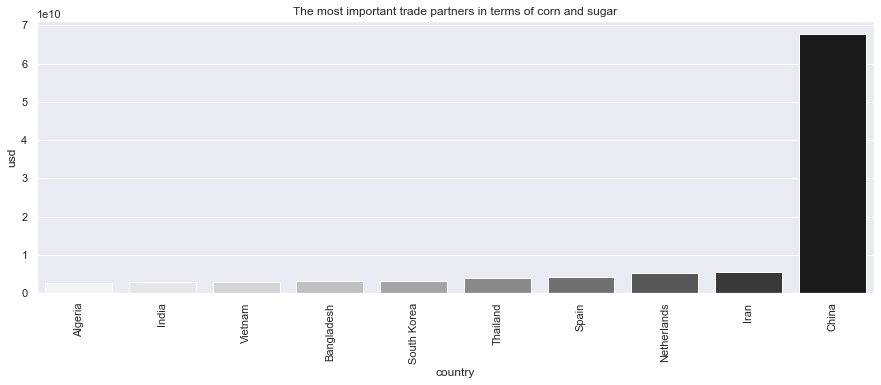

In [25]:
fig = plt.figure(figsize=(15.0, 5.0))

ordem4 = lastthreeyears.groupby('country')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = True).reset_index()[-10:]
chart = sns.barplot(x='country', y='usd', data=ordem4, ci = None, palette="Greys", order=ordem4['country'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('The most important trade partners in terms of corn and sugar');

# For each of the products in the dataset, show the 5 most important states in terms of exports?

In [26]:
print('Corn')
onlyexport[onlyexport['product'] == 'corn'].groupby('state')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:5]

Corn


,usd
state,
MT,2.837552e+10
PR,9.160512e+09
GO,5.706991e+09
MS,3.405431e+09
SP,1.511122e+09


In [27]:
print('Soybean Meal')
onlyexport[onlyexport['product'] == 'soybean_meal'].groupby('state')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:5]

Soybean Meal


,usd
state,
MT,2.799454e+10
PR,2.464996e+10
RS,1.500739e+10
GO,9.421431e+09
BA,5.439266e+09


In [28]:
print('Soybean Oil')
onlyexport[onlyexport['product'] == 'soybean_oil'].groupby('state')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:5]

Soybean Oil


,usd
state,
PR,1.110910e+10
RS,6.281965e+09
MT,5.434514e+09
SC,1.238811e+09
GO,8.559207e+08


In [29]:
print('Soybeans')
onlyexport[onlyexport['product'] == 'soybeans'].groupby('state')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:5]

Soybeans


,usd
state,
MT,8.050678e+10
PR,4.848410e+10
RS,4.613673e+10
GO,2.126883e+10
MS,1.328482e+10


In [30]:
print('Sugar')
onlyexport[onlyexport['product'] == 'sugar'].groupby('state')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:5]

Sugar


,usd
state,
SP,6.621186e+10
MG,8.559401e+09
PR,8.270779e+09
AL,4.826419e+09
MS,3.219035e+09


In [31]:
print('Wheat')
onlyexport[onlyexport['product'] == 'wheat'].groupby('state')['usd'].agg(pd.Series.sum).to_frame().sort_values('usd', ascending = False)[:5]

Wheat


,usd
state,
RS,1.555925e+09
PR,1.839354e+08
SC,2.540009e+07
SP,2.267024e+06
MS,2.757330e+05


# Now, we ask you to show your modelling skills. Feel free to use any type of modelling approach, but bear in mind that the modelling approach depends on the nature of your data, and so different models yield different estimates and forecasts. To help you out in this task we also provide you with a dataset of possible covariates (.xlsx). They all come from public sources (IMF, World Bank) and are presented in index number format. Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

In [32]:
covariates = pd.read_excel('covariates.xlsx')
covariates.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250
